In addition to exploring the general structure of this dataset and creating pretty visualizations, I attempt to generate insights into the UN member countries and, when possible, verify that these insights are consistent with real world geopolitical events and positions.

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

%matplotlib inline

# load data -- can be found here: https://www.kaggle.com/unitednations/un-general-debates/data

data = pd.read_csv('data_1.csv')
for i in range(2, 11):
    data = pd.concat([data, pd.read_csv('data_' + str(i) + '.csv')], axis=0).reset_index(drop=True)

In [2]:
print('data shape:', data.shape)
data.head()

data shape: (7507, 4)


,session,year,country,text
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ..."
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...
4,44,1989,ZWE,﻿I should like at the outset to express my del...


In [3]:
# look at first and last years in data
data.sort_values(by='year')[:3]

,session,year,country,text
174,25,1970,CAN,\nThe General Assembly is fortunate indeed to ...
171,25,1970,LBR,"49.\t It gives me great pleasure, Mr. Presiden..."
172,25,1970,KEN,"\n36.\t Mr. President, on behalf of His Excell..."


In [4]:
data.sort_values(by='year')[-3:]

,session,year,country,text
5476,70,2015,BOL,"I am enormously happy to be here, on behalf of..."
5485,70,2015,CRI,"Costa Rica would like to congratulate you, Sir..."
5548,70,2015,MYS,I would like to congratulate Mr. Mogens Lykket...


In [5]:
# convert text data to lower case (for easier analysis)
data['text'] = data['text'].str.lower()

# remove all data before 1971 -- looks like it might be incomplete
data = data[data['year'] > 1970]

In [6]:
# create features from meta text data
data['char_count'] = data['text'].str.len()
data['words'] = data['text'].str.split(' ')
data['sentences'] = data['text'].str.split('.')
data['word_count'] = data['words'].str.len()
data['sentence_count'] = data['sentences'].str.len()
data['word_length'] = data['char_count'] / data['word_count']
data['sentence_length'] = data['word_count'] / data['sentence_count']

print('avg char count:', data['char_count'].mean())
print()
print('avg word count:', data['word_count'].mean())
print('avg word length:', data['word_length'].mean())
print()
print('avg sentence count:', data['sentence_count'].mean())
print('avg sentence len:', data['sentence_length'].mean())

avg char count: 17908.235713325266

avg word count: 2730.9312894984537
avg word length: 6.630625639900695

avg sentence count: 119.26744655102864
avg sentence len: 23.51915369650372


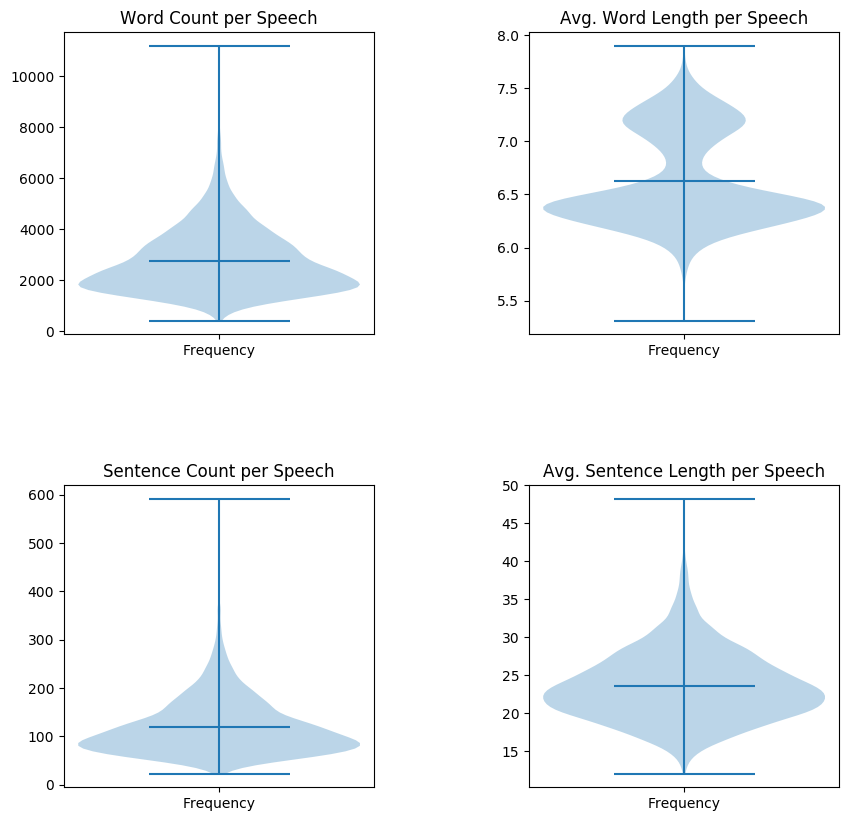

In [7]:
# Look at these meta text features' distributions
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
all_data = [data]

axes[0, 0].violinplot(data['word_count'], showmeans=True, showmedians=False)
axes[0, 0].set_title('Word Count per Speech')

axes[0, 1].violinplot(data['word_length'], showmeans=True, showmedians=False)
axes[0, 1].set_title('Avg. Word Length per Speech')

axes[1, 0].violinplot(data['sentence_count'], showmeans=True, showmedians=False)
axes[1, 0].set_title('Sentence Count per Speech')

axes[1, 1].violinplot(data['sentence_length'], showmeans=True, showmedians=False)
axes[1, 1].set_title('Avg. Sentence Length per Speech')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))], xticklabels=['Frequency'])
fig.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [8]:
# show top and bottom 5 countries by avg sentence count, avg word count, and avg sentence length
a = data['sentence_count'].groupby(data['country']).mean()
print('Avg. Sentence Count')
print(pd.concat([a.sort_values(ascending=False)[:3], a.sort_values(ascending=False)[-3:]], axis=0))
print()

a = data['word_count'].groupby(data['country']).mean()
print('Avg. Word Count')
print(pd.concat([a.sort_values(ascending=False)[:3], a.sort_values(ascending=False)[-3:]], axis=0))
print()

a = data['sentence_length'].groupby(data['country']).mean()
print('Avg. Sentence Length')
print(pd.concat([a.sort_values(ascending=False)[:3], a.sort_values(ascending=False)[-3:]], axis=0))
print()

Avg. Sentence Count
country
DEU    210.790698
RUS    210.733333
USA    200.800000
SMR     59.291667
MNE     56.100000
TON     54.933333
Name: sentence_count, dtype: float64

Avg. Word Count
country
RUS    4240.577778
IRL    4109.244444
CUB    3951.511111
LTU    1420.560000
UZB    1375.100000
BRN    1086.322581
Name: word_count, dtype: float64

Avg. Sentence Length
country
VAT    29.992076
BHR    29.592585
TUN    29.066391
DEU    17.219644
FIN    17.071593
SWE    16.691306
Name: sentence_length, dtype: float64



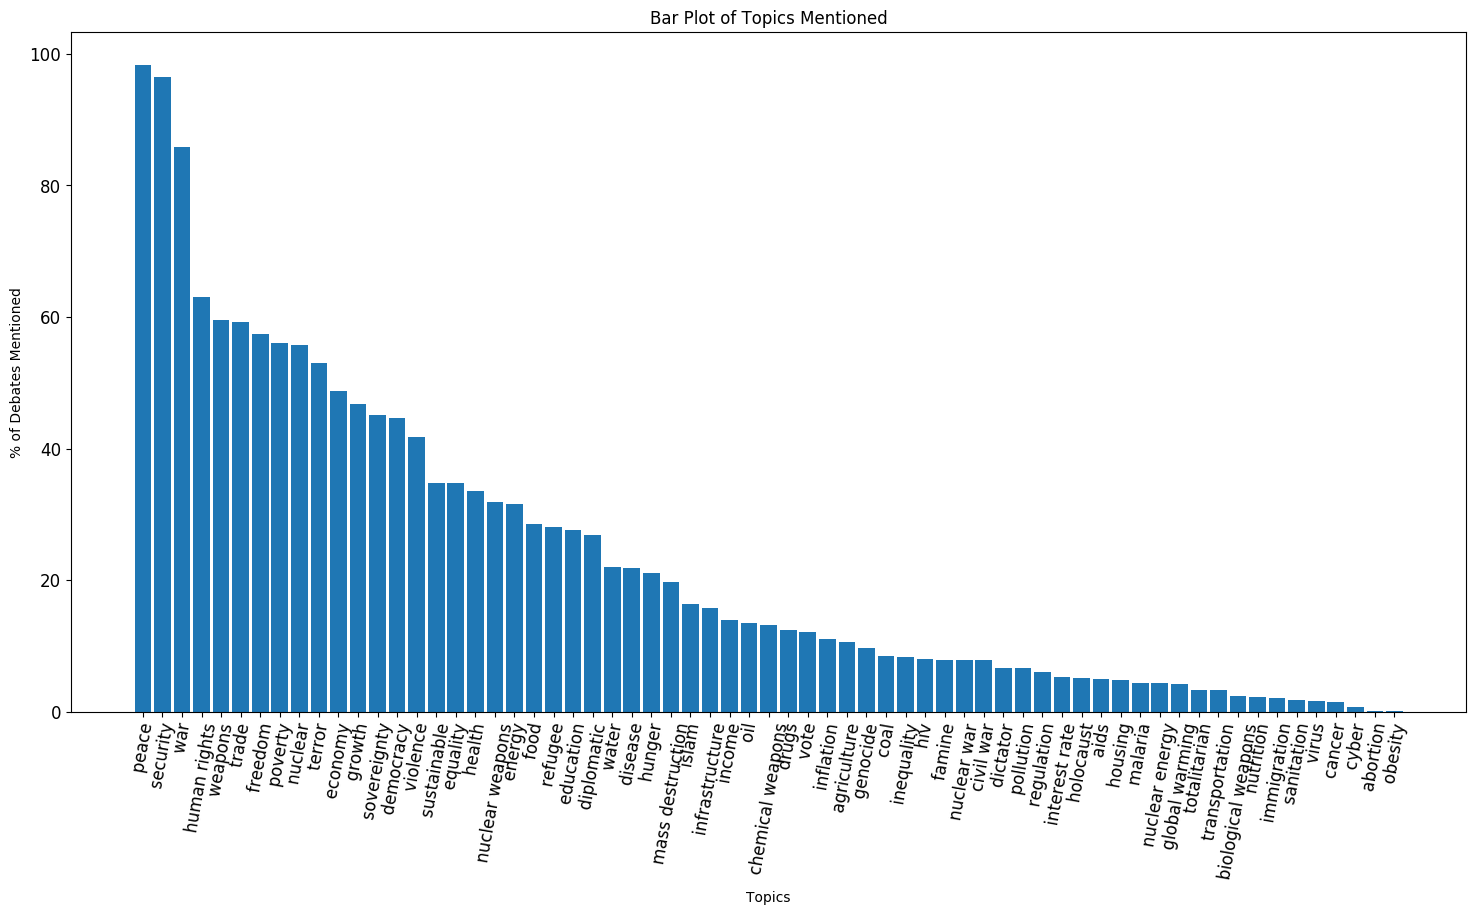

In [9]:
# create list of topics that UN member nations might discuss
topics = [' nuclear', ' weapons', ' nuclear weapons', ' chemical weapons', 
          ' biological weapons', ' mass destruction', ' peace', ' war',
          ' nuclear war', ' civil war', ' terror', ' genocide', ' holocaust',
          ' water', ' famine', ' disease', ' hiv', ' aids', ' malaria', ' cancer',
          ' poverty', ' human rights', ' abortion', ' refugee', ' immigration',
          ' equality', ' democracy', ' freedom', ' sovereignty', ' dictator',
          ' totalitarian', ' vote', ' energy', ' oil',  ' coal',  ' income',
          ' economy', ' growth', ' inflation', ' interest rate', ' security',
          ' cyber', ' trade', ' inequality', ' pollution', ' global warming',
          ' hunger', ' education', ' health', ' sanitation', ' infrastructure',
          ' virus', ' regulation', ' food', ' nutrition', ' transportation',
          ' violence', ' agriculture', ' diplomatic', ' drugs', ' obesity',
          ' islam', ' housing', ' sustainable', 'nuclear energy']

dictionary = {}

for i in topics:    
    dictionary[i] = data['year'][data['text'].str.contains(i)].count() / len(data) * 100

sorted_dictionary = sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)

labels = [i[0] for i in sorted_dictionary]
values = [i[1] for i in sorted_dictionary]
xs = np.arange(len(labels))

width = .85
plt.figure(figsize=(18, 9))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xticks(rotation=80)
plt.xlabel('Topics')
plt.ylabel('% of Debates Mentioned')
plt.title('Bar Plot of Topics Mentioned')

plt.bar(xs, values, width, align='center')
plt.xticks(xs, labels)
plt.show()

In [10]:
# # Percentage of time mentioned in a debate
# sorted_dictionary

In [11]:
# # UN Members
# data['country'].unique()

In [12]:
# count number of debates in which a nation participates
countries = data['year'].groupby(data['country']).count()
countries = pd.DataFrame(countries.reset_index(drop=False))
countries.columns = ['country', 'num speeches']

print('Most Vocal Member Nations')
print('max number of speeches given:', countries['num speeches'].max())
print(countries[countries['num speeches'] == countries['num speeches'].max()].country.unique())
print()

countries = countries.sort_values(by='num speeches')
print('Least Vocal Member Nations')
print('min number of speeches given:', countries['num speeches'].min())
print(countries.country[:10].unique().tolist())

Most Vocal Member Nations
max number of speeches given: 45
['AFG' 'ALB' 'ARG' 'AUS' 'AUT' 'BDI' 'BEL' 'BFA' 'BGR' 'BLR' 'BOL' 'BRA'
 'CAN' 'CHL' 'CHN' 'COG' 'COL' 'CUB' 'CYP' 'DZA' 'ECU' 'ESP' 'ETH' 'FIN'
 'FRA' 'GBR' 'GHA' 'GRC' 'GTM' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL'
 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'LAO' 'LKA' 'MAR' 'MEX' 'MNG' 'MRT' 'MUS'
 'MYS' 'NGA' 'NLD' 'NPL' 'NZL' 'PAK' 'PER' 'PHL' 'POL' 'QAT' 'ROU' 'RUS'
 'RWA' 'SDN' 'SLV' 'SYR' 'TUN' 'TUR' 'TZA' 'UKR' 'URY' 'USA' 'VEN' 'YEM']

Least Vocal Member Nations
min number of speeches given: 5
['SSD', 'EU', 'MNE', 'KIR', 'TLS', 'VAT', 'CHE', 'TON', 'TUV', 'NRU']


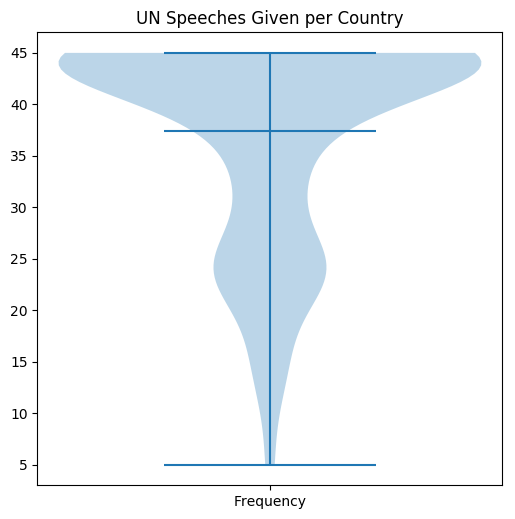

In [13]:
# Plot distribution of number of speeches per country
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
all_data = [countries['num speeches']]
axes.violinplot(countries['num speeches'], showmeans=True, showmedians=False)
axes.set_title('UN Speeches Given per Country')

plt.setp(axes, xticks=[y+1 for y in range(len(all_data))], xticklabels=['Frequency'])
plt.show()

In [14]:
# Plot a horizontal bar graph displaying the frequency of a given topic by country
def freqMentioned (df, country_list, topic_list, colors):
    data = df.loc[df['country'].isin(country_list)]

    for i in topic_list:
        data[i] = data['text'].str.contains(i)
        data[i].loc[data[i] == False] = np.nan

    country = country_list[0]
    data_out = pd.DataFrame(data.loc[data['country'] == country].count())
    data_out = (data_out.T)[topic_list]
    
    # sort the columns by summed occurence in countries specified
    countries = country_list.copy()
    countries.remove(country)

    for i in countries:
        a = pd.DataFrame(data.loc[data['country'] == i].count())
        a = (a.T)[topic_list].copy()
        data_out = pd.concat([data_out, a], axis=0)

    dictionary = {}
    
    for i in topic_list:
        dictionary[i] = data_out[i].sum()
        
    sorted_dictionary = sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)
    data_out = data_out[[i[0] for i in sorted_dictionary]]
    data_out.index = country_list
    data_out.T.plot(kind="barh", width=.6, stacked=True, figsize = (10, len(topic_list)/3), color=colors).legend(bbox_to_anchor=(1, 1))
    
    return data_out

/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,peace,security,war,nuclear,weapons,human rights,terror,freedom,trade,economy,...,malaria,pollution,housing,global warming,virus,sanitation,cancer,nutrition,immigration,transportation
USA,45,44,43,39,43,40,37,40,32,32,...,5,6,1,1,1,1,1,1,1,1
RUS,45,45,42,40,41,32,33,30,15,14,...,2,0,3,0,2,0,0,1,0,0
GBR,44,45,43,29,29,29,26,29,33,24,...,2,1,3,4,0,1,0,1,0,0
FRA,45,45,43,32,33,35,29,28,25,15,...,3,2,1,3,1,1,1,0,0,0
CHN,45,45,41,36,28,12,17,13,33,35,...,0,1,0,0,0,0,1,0,2,1


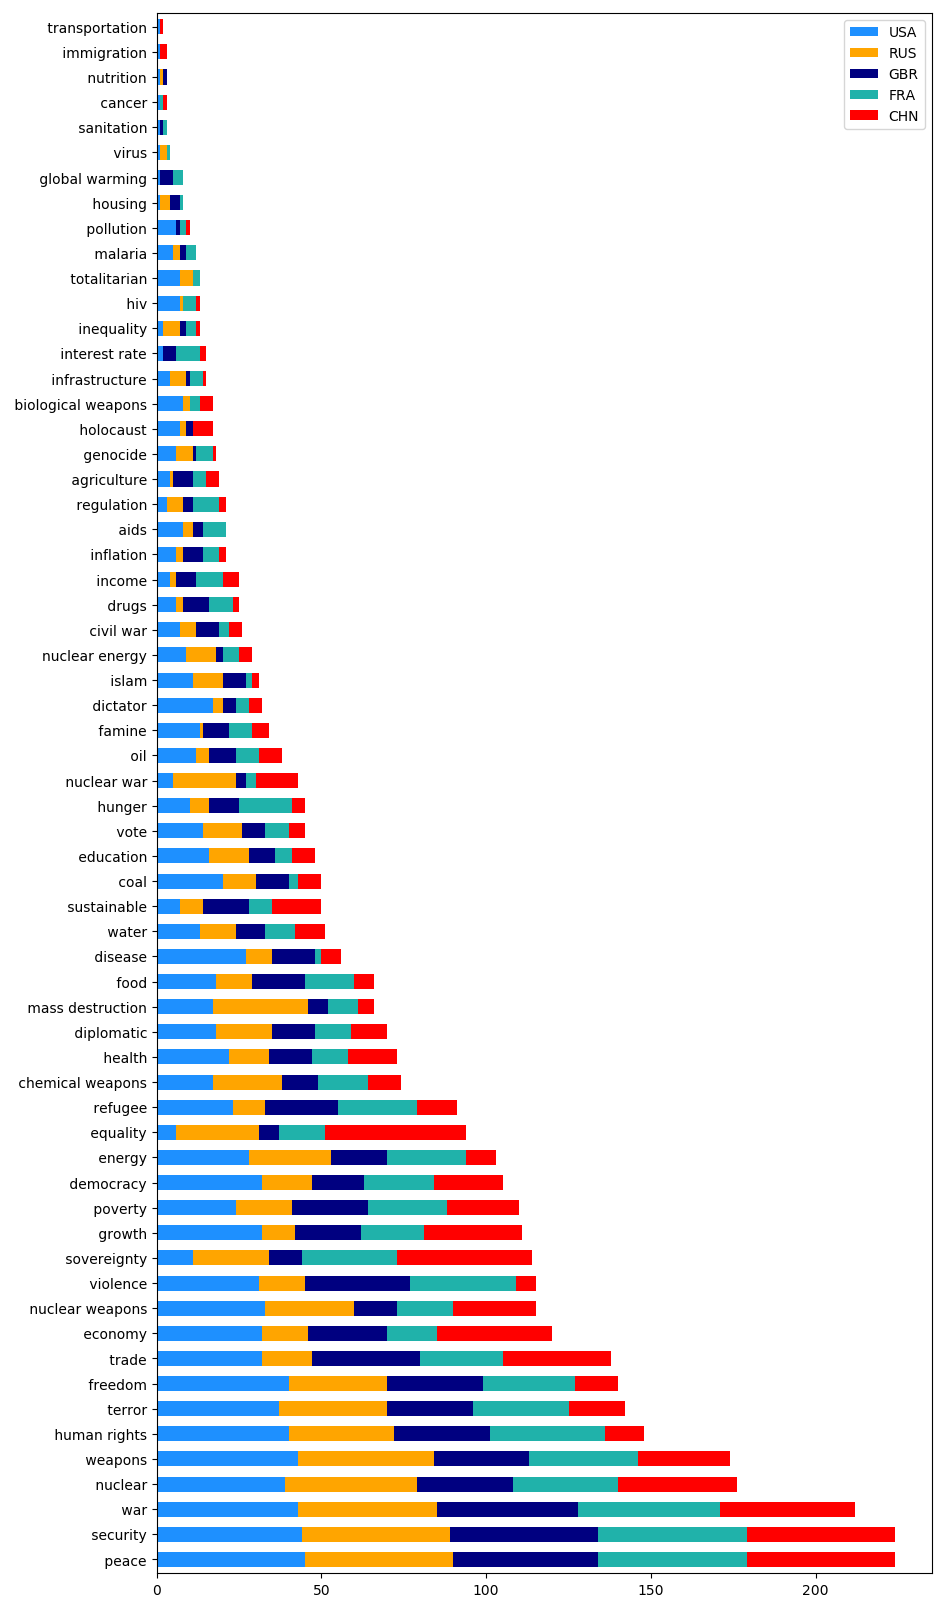

In [15]:
# Permanent Members of the UN Security Council
sec_council = ['USA', 'RUS', 'GBR', 'FRA', 'CHN']

topics = []
for i in sorted_dictionary:
    if i[1] > 1:
        topics.append(i[0])

colors = ['dodgerblue', 'orange', 'navy', 'lightseagreen', 'r']
freqMentioned(data, sec_council, topics, colors)

There are a lot of interesting insights to unpack from this plot. First, the permanent members of the UN Security Council (and almost all UN member nations) are primarily concerned with: **Peace**, **Security**, **War**, **Nuclear Weapons**, **Terrorism**, and **Human Rights**. The rest of the UN's stated goals -- e.g. education, food, transportation, sustainability, disease, health, sanitation, etc. -- receive a comparably small amount of attention.

The distribution of UN Security Council discussion is intriguing too.

**China** has little to say on **human rights**, **freedom**, and **global violence** but it is outspoken about **equality**, **sovereignty**, **trade**, **growth**, and **sustainability**.

The US, France, and Great Britain are typically unified in their discussion points, but there are exceptions.  **Great Britain** appears reluctant to mention **sovereignty** and **nuclear energy**. These avoidances make sense. For years, nations (e.g. Scotland) within Great Britain have wanted but failed to achieve independence; Great Britain would not want or be able to credibly advocate for sovereignty while denying such rights to its own citizens. Similarly, the decades old controversy around nuclear power in Great Britain may explain why the country is less vocal than France in supporting this form of clean energy despite promoting general sustainability.

see: https://en.wikipedia.org/wiki/Nuclear_power_in_the_United_Kingdom#Public_opinion_and_protests

The **US** is an outsized peddler of **democracy**, **freedom**, **growth**, and **disease** while being rather quiet on **sustainability**, **equality**, and **sovereignty**. Most readers will have their own ideas for why this might be.

Finally, **Russia** seems to enjoy talking about everything *except* **trade** (remember, it is often the recipient of international sanctions), **economic growth** (given its mediocre economic performance since 1970...), **refugees**, and **food / famine**. 

/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,peace,conflict,asia,united states,human right,treaty,terror,partner,growth,democracy,...,tokyo,seoul,starvation,nuclear material,ally,grain,navy,south china sea,rice,dmz
USA,45,41,30,45,40,30,37,26,32,32,...,6,2,4,10,1,3,1,2,2,0
RUS,45,43,30,38,32,40,33,37,10,15,...,1,1,2,1,1,1,1,0,0,0
KOR,25,24,22,11,23,17,18,15,14,18,...,1,15,3,3,0,0,0,0,0,1
PRK,25,11,22,25,20,8,9,2,1,8,...,0,1,0,0,0,0,0,0,0,0
JPN,45,40,36,34,28,32,23,23,24,14,...,31,6,8,0,0,0,0,0,1,0
CHN,45,38,37,24,12,22,17,11,30,21,...,0,0,2,0,8,4,1,1,0,0


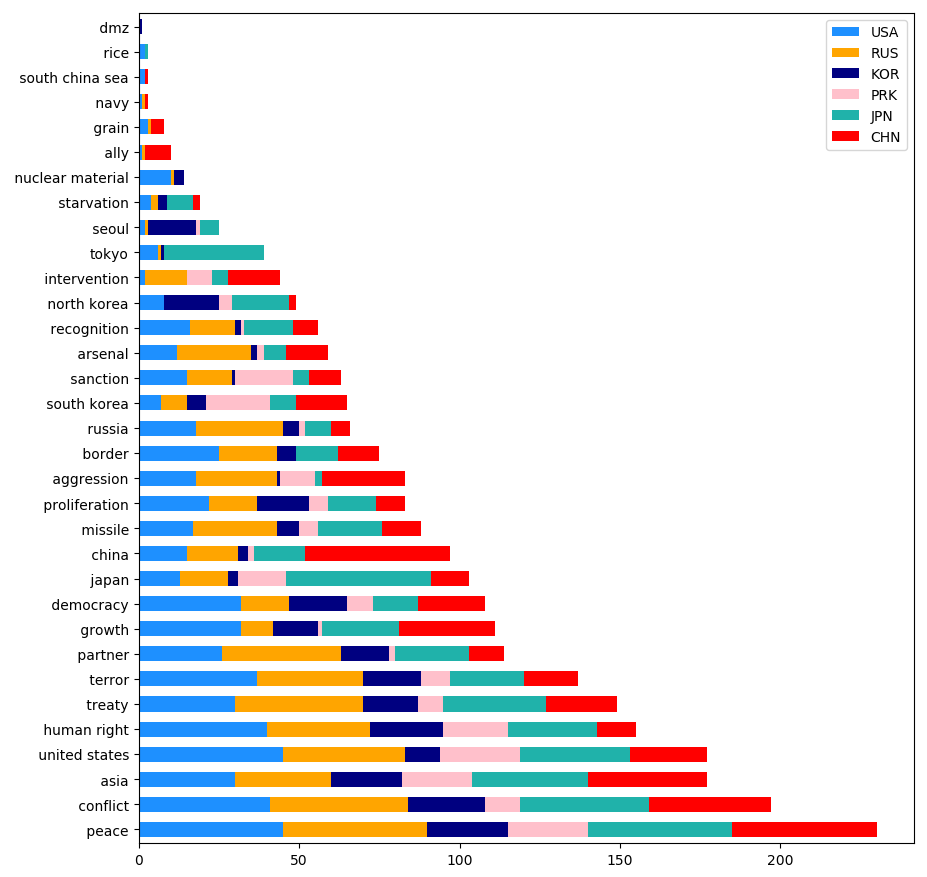

In [16]:
# Korea & Neighbors
countries = ['USA', 'RUS', 'KOR', 'PRK', 'JPN', 'CHN']

topics = [' united states', ' north korea', ' south korea', ' south china sea', ' asia', ' peace',
          ' navy', ' arsenal', ' aggression', ' treaty', ' dmz', ' missile',
          ' nuclear material', ' sanction', ' terror', ' border', ' seoul',
          ' growth', ' democracy', 'tokyo', ' intervention', ' human right',
          ' recognition', ' ally', ' partner', ' japan', ' china', ' proliferation',
          ' conflict', ' russia', ' rice', ' grain', ' starvation']

colors = ['dodgerblue', 'orange', 'navy', 'pink', 'lightseagreen', 'r']
freqMentioned(data, countries, topics, colors)

Again, there's a lot to unpack here. Most obviously, North Korea and South Korea appear reluctant to discuss peace and treaties; Japan, on the other hand, seems adament and vocal about encouraging peace in the area. This makes sense given Japan's geographic proximity and general penchant for pacifism.

Second, though China, Russia, the US, and Japan refer to their own respective countries more than any other UN member, South Korea is the largest "referer" to North Korea and North Korea is similarly the largest "referer" to South Korea. Blame game? North Korea is also vocal about human rights (unclear if its mentions are rebuttals for human rights abuses or flimsy human rights advocacy) and sanctions.

Another interesting observation is that China and Russia both refer to aggression at a relatively high level. Whether that's because China and Russia feel like victims of aggression or because they are addressing accusations of aggression is unclear; given both countries' numerous references to peace, conflict, and intervention, the answer is probably a combination of both.

/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,peace,arab,israel,conflict,terror,iraq,lebanon,palestine,syria,jerusalem,...,judaism,solar,sunni,shia,mecca,foreign investment,desalination,opec,free speech,gender equality
USA,45,25,29,41,37,26,14,8,12,5,...,0,2,3,4,0,0,0,1,1,0
ISR,45,43,45,39,42,22,36,17,37,28,...,3,3,1,0,0,0,2,0,0,0
IRQ,43,40,25,36,29,45,19,27,9,13,...,0,0,1,1,0,1,0,1,0,1
EGY,43,43,41,40,26,29,23,33,30,27,...,2,0,0,0,2,0,0,0,0,0
PSE,18,17,18,17,13,7,3,18,7,16,...,1,0,0,0,0,0,0,0,0,0
JOR,45,44,44,39,23,29,26,38,24,34,...,1,0,0,0,0,0,0,0,0,0
LBN,41,39,41,36,26,11,41,28,25,10,...,0,0,0,0,1,0,0,0,0,0
SYR,45,45,45,38,28,24,30,23,44,25,...,0,0,0,0,1,1,0,0,0,0


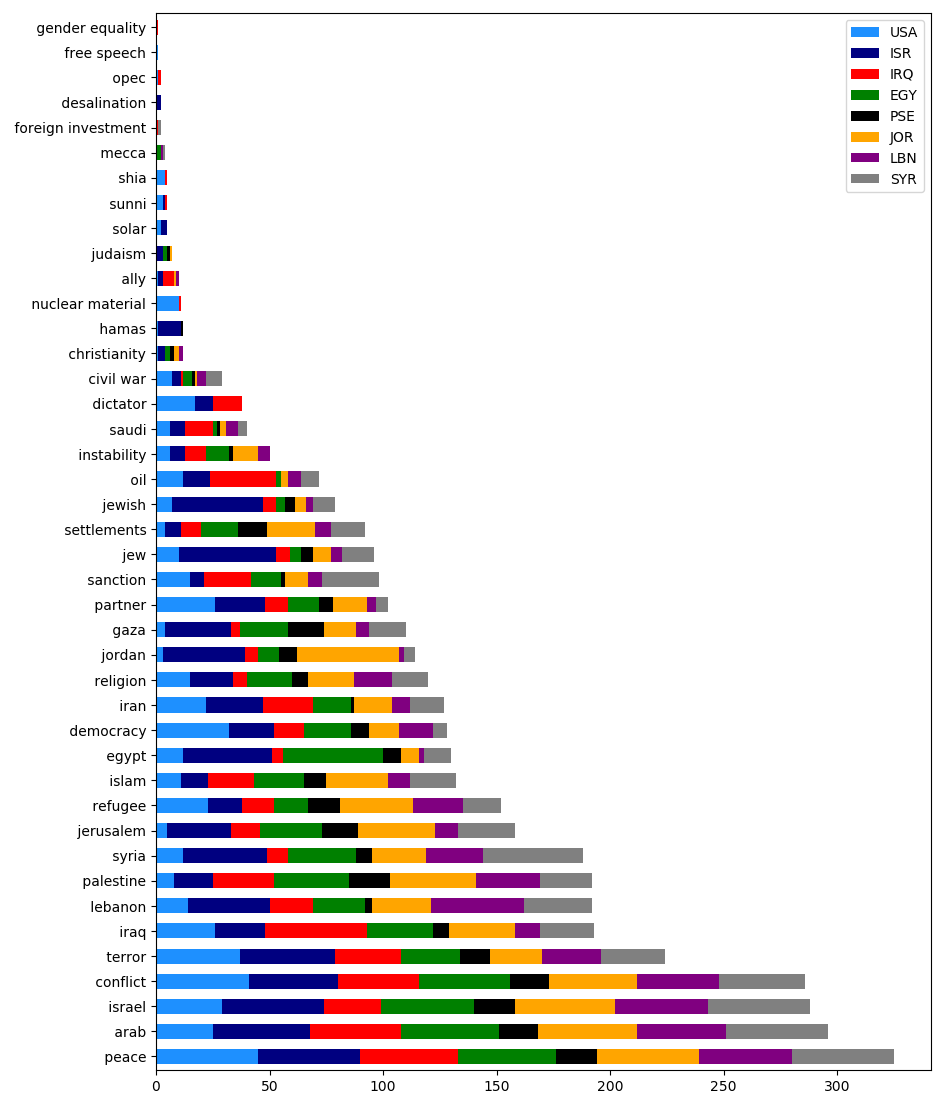

In [17]:
# Middle East
countries = ['USA', 'ISR', 'IRQ', 'EGY', 'PSE', 'JOR', 'LBN', 'SYR']

topics = [' iran', ' iraq', ' israel', ' egypt', ' palestine', ' terror', ' jordan',
          ' refugee', ' hamas', ' lebanon', ' saudi', ' oil', ' nuclear material',
          ' sanction', ' settlements', ' gaza', ' opec', ' foreign investment',
          ' desalination', ' syria', ' dictator', ' democracy', ' gender equality',
          ' islam', ' jewish', ' judaism', ' jerusalem', ' religion', ' christianity',
          ' mecca', ' sunni', ' shia', ' solar', ' instability', ' civil war', ' peace',
          ' partner', ' ally', ' arab', ' conflict', ' jew', ' free speech']

colors = ['dodgerblue', 'navy', 'r', 'green', 'black', 'orange', 'purple', 'grey']
freqMentioned(data, countries, topics, colors)

This probably isn't the best basket of words and countries, but it's interesting nonetheless. The Middle East is a bit too complicated for me to delve into here, but feel free to look around! 

/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,fruit,water,climate change,coal,oil,tariff,iron,gas,wood,paper,...,ivory,rubber,copper,tin,glass,nickel,aluminum,magnesium,lithium,siicon
USA,6,13,8,20,12,8,9,9,0,3,...,1,0,0,0,1,0,0,0,0,0
RUS,17,11,6,11,4,3,3,1,2,5,...,0,0,0,1,0,0,0,0,0,0
CAN,4,12,8,8,6,6,4,3,2,4,...,0,0,0,0,0,0,0,0,0,0
NGA,3,10,7,0,11,2,4,0,6,0,...,1,1,0,0,0,0,0,0,0,0
IND,8,10,12,6,6,4,6,2,6,4,...,0,0,1,0,0,0,0,0,0,0
BRA,23,2,10,3,8,11,3,7,6,0,...,0,0,0,0,0,0,0,0,0,0
CHN,10,9,8,7,7,3,3,0,0,5,...,0,0,0,0,0,0,0,0,0,0


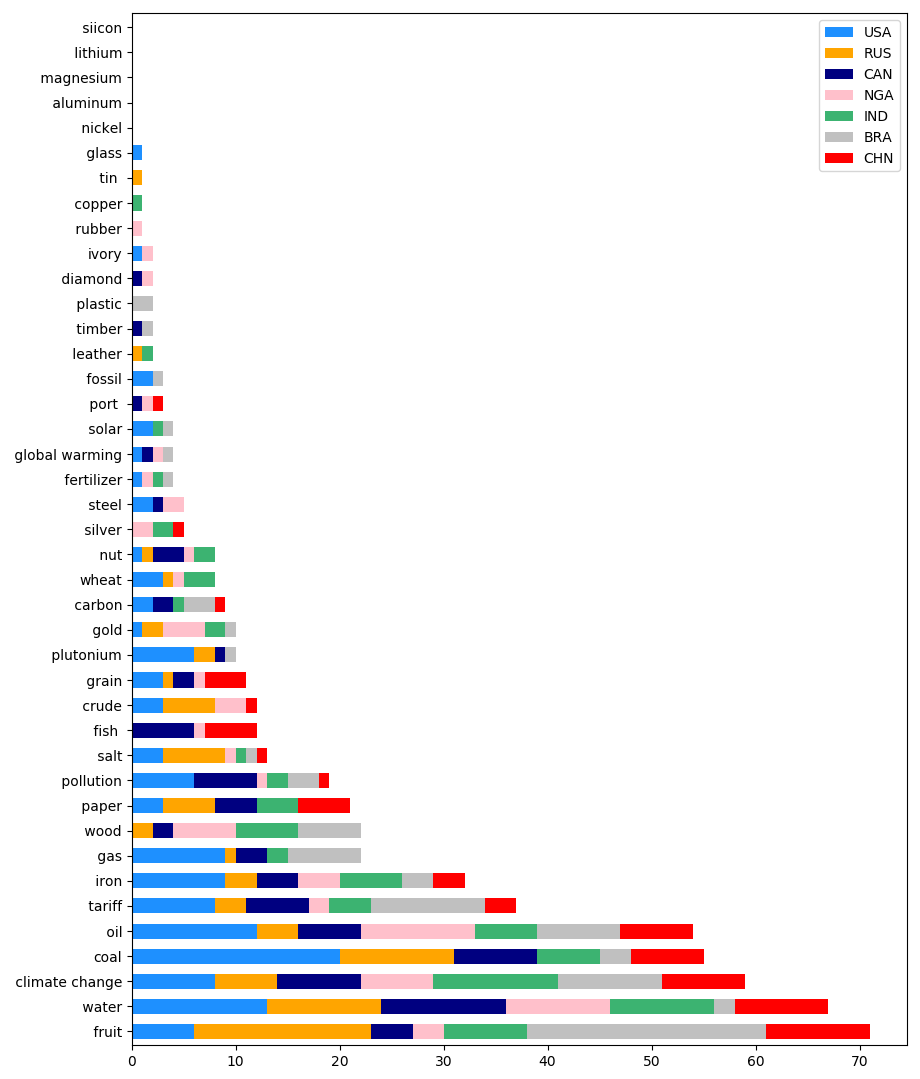

In [18]:
# BRINC + USA + Canada
countries = ['USA', 'RUS', 'CAN', 'NGA', 'IND', 'BRA', 'CHN']

topics = [' oil', ' water', ' crude', 'coal', ' gas', ' solar', 'wheat',
          ' tin ', ' diamond', ' wood', 'ivory', ' plutonium', ' fossil',
          ' pollution', ' carbon', ' global warming', ' climate change', 
          ' fertilizer', ' aluminum', ' steel', ' iron', ' timber', ' siicon',
          ' gold', ' silver', ' copper', ' lithium', ' salt', ' magnesium',
          ' rubber', ' paper', ' plastic', ' glass', ' nickel', ' grain',
          ' fruit', ' tariff', ' fish ', ' port ', ' leather', ' nut']

colors = ['dodgerblue', 'orange', 'navy', 'pink', 'mediumseagreen', 'silver', 'r']
freqMentioned(data, countries, topics, colors)

So, this is a bit odd. I wasn't expecting fruit to be a high-priority item on the UN's agenda (higher than water and climate change?!), but it is -- largely due to Brazil and Russia.

Fruits aside, country topic interest appears reasonable. The US cares about cheap energy and is consequently vocal about oil, coal, and gas. Canada and China do a lot of fishing and consequently care about international regulations on fish. India has 1.3B people and is projected to be most impacted by higher global temperatures; it thus has opinions on climate change. etc.

In my estimation, the oddest part of this graph is the lack of discussion about lithium, aluminum, magnesium, and other such metals. In the digital era, we might expect the material resources underpinning every electronic device and battery to be a strategic asset -- perhaps there's more at play?

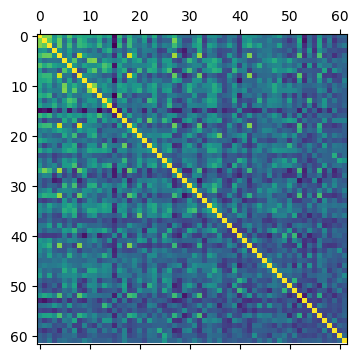

In [19]:
topics = []
for i in sorted_dictionary:
    if i[1] > 1:
        topics.append(i[0])

def textFreq(df, topic_list):
    data = df.copy()
    for i in topic_list:
        data[i] = data['text'].apply(lambda x: x.count(i))
    return data

def GroupFreq(df, topic_list, grouping_column):
    topic_freq = textFreq(df, topic_list)
    topic_list.append(grouping_column)
    topic_freq = topic_freq[topic_list]
    topic_freq_col = topic_freq.groupby(topic_freq[grouping_column]).sum()
    return topic_freq_col

topic_freq_county = GroupFreq(data, topics, 'country')
plt.matshow(topic_freq_county.corr())
topic_freq_year = GroupFreq(data, topics, 'year')

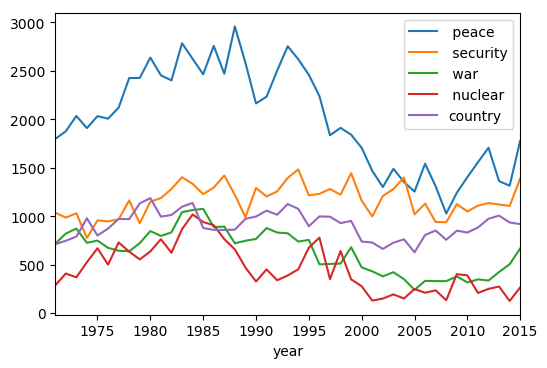

In [20]:
topics_keep = []
for i in topic_freq_year.columns:
    if topic_freq_year[i].sum() > 20000:
        topics_keep.append(i)

topic_freq_year[topics_keep].plot()

Peace has been and continues to be the most discussed topic at the UN General Debate. This makes sense, but it's interesting to note that discussion of "peace" has declined from a peak in 1987, though it's rebounded since. A few questions come to mind:
* is the UN overly focused on international peace?
* why did discussion change in the late 1980s?
* what effects might less focus on peace bring about?

Also interesting is the decline in discussion of "nuclear" and "war". This might be why 'peace' discussions have declined -- less war would imply fewer calls for peace --  or it may indicate the achievement of a stable, long-term geopolitical stand-off on major conflict and nuclear weapons. Indeed, there is a strong sense that the world's largest powers today -- Russia, China, Europe, the US, and even the other BRICS -- are unwilling to engage in direct military confrontation.

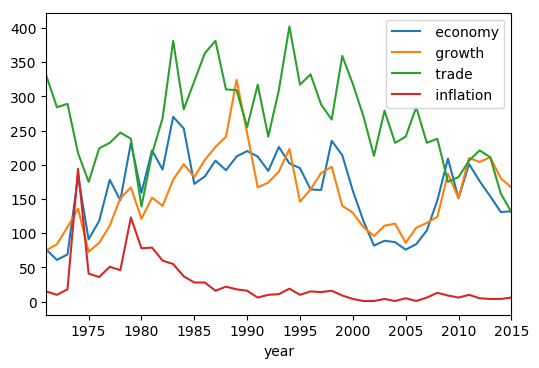

In [21]:
topic_freq_year[[' economy', ' growth', ' trade', ' inflation']].plot()

Discussion on "economy" and "growth" appear to be related, with talk of growth having plummeted since 2000. During the global recession in 2008-2010 and the ensuing Eurozone crisis, UN attention toward the economy  rose, but has lagged since 2012. Given the developed world's sluggish growth, does lack of economic-focused discussion suggest UN delegates care less about economic growth now than in the past? Or, does it suggest delegates feel increasingly unable to affect economic growth, and are therefore giving up on the developed world's continued prosperity?

As an aside, talk of trade has also fallen dramatically since 2000. This trend likely reflects the diminishing returns and opportunities for more trade as well as the strong political realities that remain. Similarly, international concerns about inflation largely vanished after the severe cost-push inflation of the late 70s and early 80s.

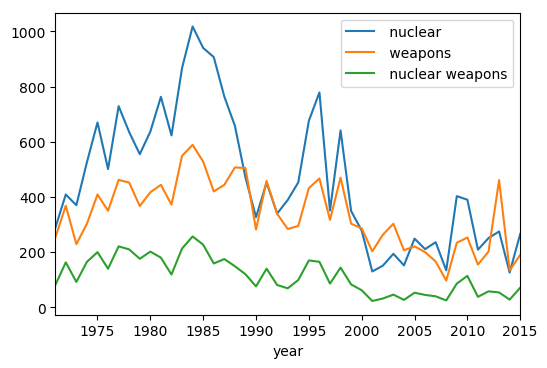

In [22]:
topic_freq_year[[' nuclear', ' weapons', ' nuclear weapons']].plot()

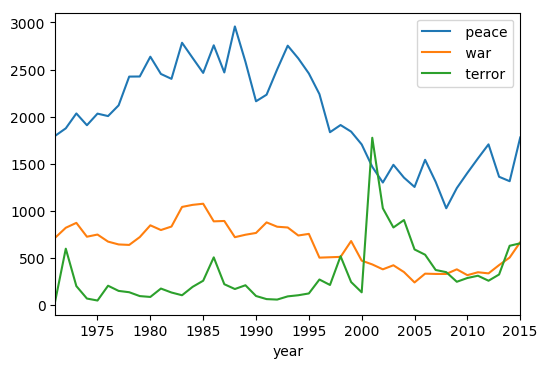

In [23]:
topic_freq_year[[' peace', ' war', ' terror']].plot()

Since 2001 (i.e. the 9/11 terrorist attack), discussion of "terror" -- including 'terrorism', 'terrorist', etc. has skyrocketed. While the focus on terror cooled from 2005-2013, recent developments e.g. ISIS? appear to have returned attention to the subject.

As noted before, the discussion of "peace" has fallen while the discussion of "war" has remained relatively constant. It is not yet clear how much of "war" refers to the "war on drugs" and "war on terror", but this is an interesting observation and something to investigate more thoroughly.

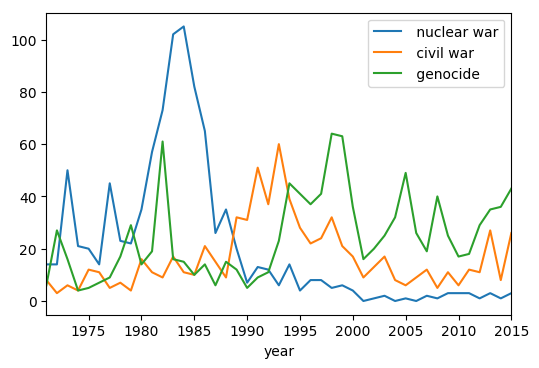

In [24]:
topic_freq_year[[' nuclear war', ' civil war', ' genocide']].plot()

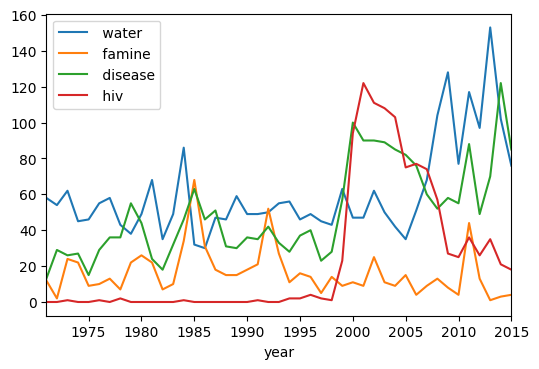

In [25]:
topic_freq_year[[' water', ' famine', ' disease', ' hiv']].plot()

The HIV crisis, which appears to have taken off in the late 1990s, was resolved by 2010 insofar as international attention is concerned. Meanwhile, "famine" has stayed constant while debate around "disease" and "water" have risen dramatically i.e. 2x in 8 years. As malnutrition subsides, we can expect more attention on health, education, equality, etc., and less on famine and food.

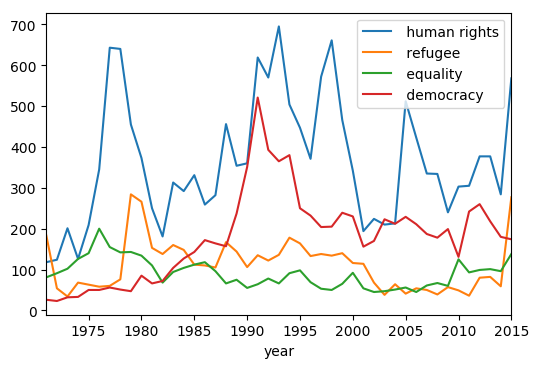

In [26]:
topic_freq_year[[' human rights', ' refugee', ' equality', ' democracy']].plot()

Human rights -- though always an important point of discussion -- are spotlighted by well-publicized global atrocities (e.g. genocides, refugee crises, etc). In 2015, it looks like the refugee crisis may have reinvigorated the human rights debate. It's still too early to tell what will happen here. Based on pasted examples, we might expect this resurgent interest to subside over the next several years.

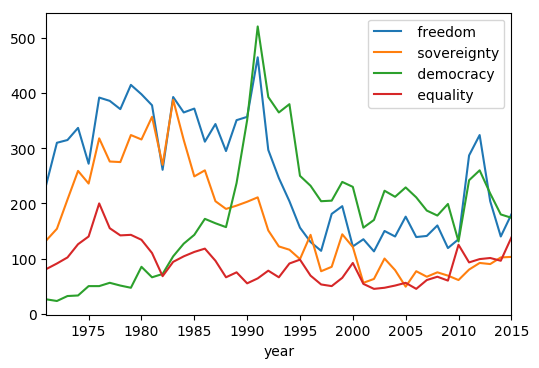

In [27]:
topic_freq_year[[' freedom', ' sovereignty', ' democracy', ' equality']].plot()

From 1970-1990, "freedom" and "sovereignty" appeared closely related. Then, in 1990 -- at the collapse of the USSR -- "freedom" seems to have become more closely associated with "democracy" and has remained so since. The modified frameowkr of freedom (i.e. that it necessitates democracy) would align with the Tiananmen Square protest of 1989 and Western interventionism throughout the 1990s and early 2000s.

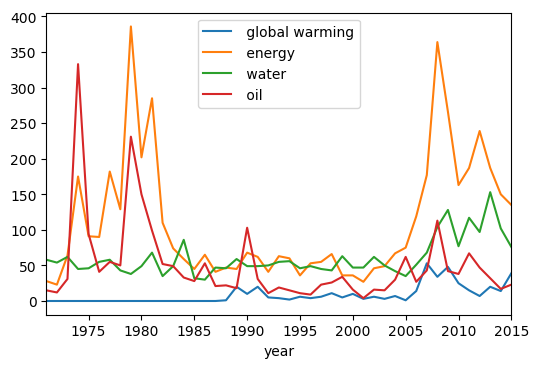

In [28]:
topic_freq_year[[' global warming', ' energy', ' water', ' oil']].plot()

Until 1985, "oil" and "energy" appeared closely related. However, since then discussion of "energy" has diverged from "oil" -- probably as new forms of fuel (e.g. natural gas, smart coal, solar energy, etc.) became available and cost effective. Now, "oil" now appears to track "global warming" more than "energy."

In [29]:
# # Top five advocate countries per cause
# for i in topic_freq_county.columns:
#     topic_freq_county = topic_freq_county.sort_values(by=i, ascending=False)
#     print(i)
#     print(topic_freq_county.index.tolist()[:5])
#     print()

In [30]:
# # Top seven priorities for each member country
# topic_freq_county = topic_freq_county.sort_index()
# topic_freq_county = topic_freq_county.T

# for i in topic_freq_county.columns:
#     topic_freq_county = topic_freq_county.sort_values(by=i, ascending=False)
#     print(i)
#     print(topic_freq_county.index.tolist()[:7])
#     print()

Well, that's a wrap!

I hope my EDA was of some help and interest. Please feel free to leave a comment, suggestion, or critique!